# Clustering - K-means
## CardWise - Customer Segmentation Analysis

---

# Executive Summary / תקציר מנהלים

## Objective / מטרה
Segment CardWise credit card customers into distinct groups using K-Means clustering to enable targeted marketing, personalized offers, and credit risk management.

## Dataset / מערך נתונים
- **8,950 customers** with 17 features
- Financial behavior data: balances, purchases, cash advances, payments
- Missing values treated with median imputation

## Methodology / מתודולוגיה
1. Data preprocessing and feature selection (8 features)
2. StandardScaler normalization
3. Optimal k selection using Elbow + Silhouette methods
4. K-Means clustering with k=5

## Key Results / תוצאות עיקריות

| Cluster | Name | Size | Description |
|---------|------|------|-------------|
| 0 | **VIP Shoppers** | 1.5% | High purchases, high payments, premium customers |
| 1 | **Active Buyers** | 42.8% | Regular healthy customers, frequent purchases |
| 2 | **Outliers** | 0.4% | Extreme debt cases (minimum payments only) |
| 3 | **Low Activity** | 42.4% | Inactive customers, growth opportunity |
| 4 | **Cash Advance Seekers** | 12.9% | High-risk segment, potential financial distress |

## Business Recommendations / המלצות עסקיות
- **VIP (0):** Premium rewards, exclusive offers
- **Active (1):** Loyalty programs, upsell opportunities
- **Low Activity (3):** Activation campaigns (42% untapped potential!)
- **Cash Advance (4):** Risk monitoring, financial counseling
- **Outliers (2):** Debt restructuring programs

---

## 1. Load the data into a DataFrame
## 1. טעינת הקובץ ל-DataFrame

In [3]:
import pandas as pd

dataset = pd.read_csv('Customer Data.csv')

## 2. Display head(), info() and describe()
## 2. הצגת head(), info() ו-describe()

In [4]:
# Display first 5 rows
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Display data types and non-null counts
dataset.info()
print(f"Dataset shape: {dataset.shape}")
print(f"Number of customers: {dataset.shape[0]}")
print(f"Number of features: {dataset.shape[1]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
# Display statistical summary
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 3. Check for missing values and handling strategy
## 3. בדיקת ערכים חסרים ושיטת טיפול

In [12]:
# Check missing values per column
missing_values = dataset.isnull().sum()
missing_percent = (missing_values / len(dataset)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2)
})

# Show only columns with missing values
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage (%)


### Missing Values Treatment Strategy / שיטת טיפול בערכים חסרים

**CREDIT_LIMIT** - 1 missing value (0.01%)
- Since it's only 1 value, we can either drop this row or fill with median
- Recommendation: Fill with **median** (more robust to outliers than mean)

**MINIMUM_PAYMENTS** - 313 missing values (3.5%)
- This represents a small percentage of the data
- Recommendation: Fill with **median** (financial data often has outliers, so median is preferred over mean)

---

**CREDIT_LIMIT** - ערך חסר 1
- מכיוון שמדובר בערך בודד, ניתן למחוק את השורה או למלא במדיאנה
- המלצה: מילוי ב**מדיאנה** (עמידה יותר לערכי קיצון מאשר ממוצע)

**MINIMUM_PAYMENTS** - 313 ערכים חסרים (3.5%)
- זהו אחוז קטן מהנתונים
- המלצה: מילוי ב**מדיאנה** (נתונים פיננסיים לרוב מכילים ערכי קיצון, לכן מדיאנה עדיפה על ממוצע)

In [13]:
# Fill missing values with median
dataset['CREDIT_LIMIT'] = dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].median())
dataset['MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].median())

# Verify no missing values remain
print("Missing values after treatment:")
print(dataset.isnull().sum().sum())

Missing values after treatment:
0


---

# Part B - Exploratory Data Analysis (EDA)
# חלק ב' - ניתוח חקר נתונים

## 1. Correlation Matrix / מטריצת קורלציה
Calculate and interpret the correlation matrix between the main features:
BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS

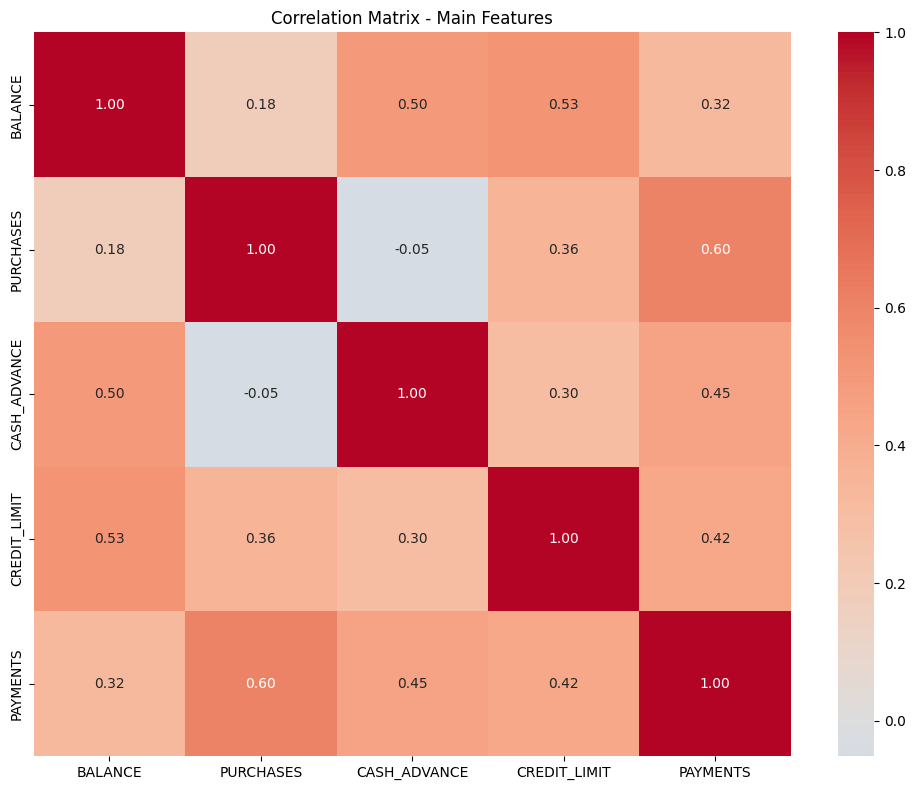

Correlation Matrix:


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
BALANCE,1.000000,0.181261,0.496692,0.531296,0.322802
PURCHASES,0.181261,1.000000,-0.051474,0.356977,0.603264
CASH_ADVANCE,0.496692,-0.051474,1.000000,0.303997,0.453238
CREDIT_LIMIT,0.531296,0.356977,0.303997,1.000000,0.421876
PAYMENTS,0.322802,0.603264,0.453238,0.421876,1.000000


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select main features for correlation analysis (excluding CUST_ID and TENURE)
main_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

# Calculate correlation matrix
correlation_matrix = dataset[main_features].corr()

# Display correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Main Features')
plt.tight_layout()
plt.show()

# Display correlation values
print("Correlation Matrix:")
correlation_matrix

## 2. Visualization / ויזואליזציה

### 2.1 Histograms - BALANCE and PURCHASES distributions
### היסטוגרמות - התפלגות BALANCE ו-PURCHASES

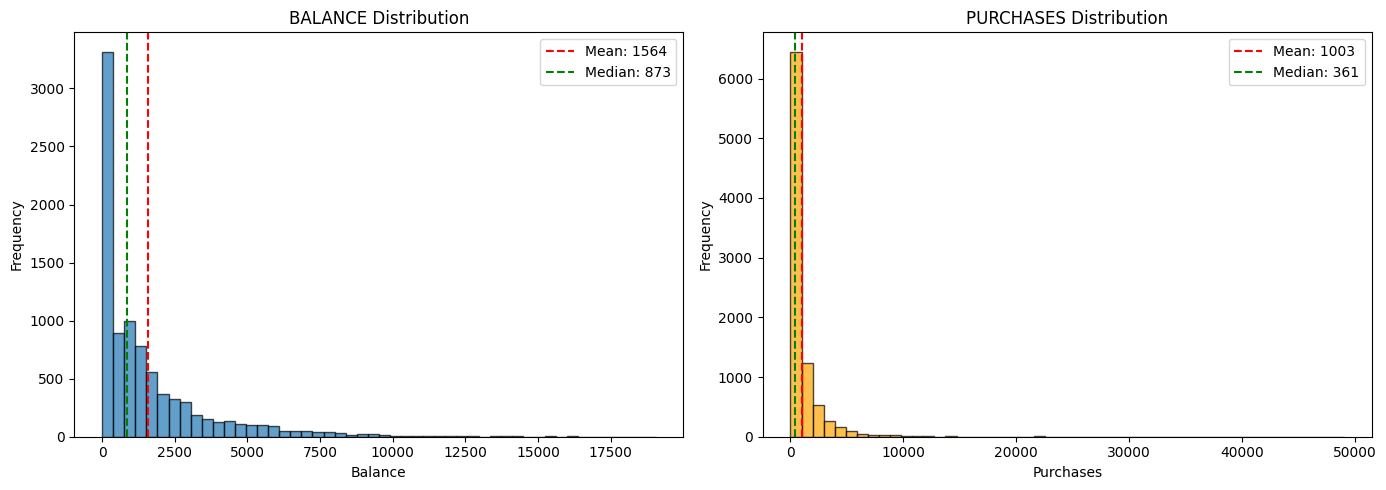

Observations:
- Both distributions show right-skewness (positive skew)
- Mean > Median indicates presence of outliers pulling the mean upward
- Most customers have relatively low balance and purchases values


In [24]:
# Histograms for BALANCE and PURCHASES
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# BALANCE histogram
axes[0].hist(dataset['BALANCE'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('BALANCE Distribution')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Frequency')
axes[0].axvline(dataset['BALANCE'].mean(), color='red', linestyle='--', label=f"Mean: {dataset['BALANCE'].mean():.0f}")
axes[0].axvline(dataset['BALANCE'].median(), color='green', linestyle='--', label=f"Median: {dataset['BALANCE'].median():.0f}")
axes[0].legend()

# PURCHASES histogram
axes[1].hist(dataset['PURCHASES'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('PURCHASES Distribution')
axes[1].set_xlabel('Purchases')
axes[1].set_ylabel('Frequency')
axes[1].axvline(dataset['PURCHASES'].mean(), color='red', linestyle='--', label=f"Mean: {dataset['PURCHASES'].mean():.0f}")
axes[1].axvline(dataset['PURCHASES'].median(), color='green', linestyle='--', label=f"Median: {dataset['PURCHASES'].median():.0f}")
axes[1].legend()

plt.tight_layout()
plt.show()

print("Observations:")
print("- Both distributions show right-skewness (positive skew)")
print("- Mean > Median indicates presence of outliers pulling the mean upward")
print("- Most customers have relatively low balance and purchases values")

### 2.2 Scatter Plot - PURCHASES vs CASH_ADVANCE

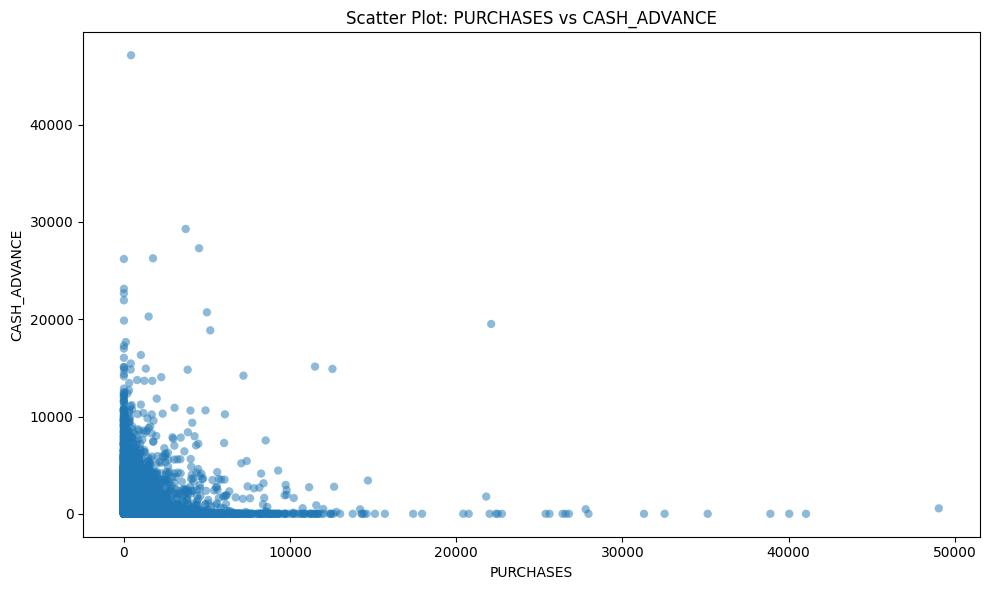

Correlation between PURCHASES and CASH_ADVANCE: -0.051

Observation: Low/negative correlation suggests these represent different customer behaviors


In [25]:
# Scatter plot: PURCHASES vs CASH_ADVANCE
plt.figure(figsize=(10, 6))
plt.scatter(dataset['PURCHASES'], dataset['CASH_ADVANCE'], alpha=0.5, edgecolors='none')
plt.xlabel('PURCHASES')
plt.ylabel('CASH_ADVANCE')
plt.title('Scatter Plot: PURCHASES vs CASH_ADVANCE')
plt.tight_layout()
plt.show()

# Calculate correlation between these two features
corr = dataset['PURCHASES'].corr(dataset['CASH_ADVANCE'])
print(f"Correlation between PURCHASES and CASH_ADVANCE: {corr:.3f}")
print("\nObservation: Low/negative correlation suggests these represent different customer behaviors")

## 3. Outliers Detection / זיהוי נקודות קיצון

Boxplots for CASH_ADVANCE and CREDIT_LIMIT

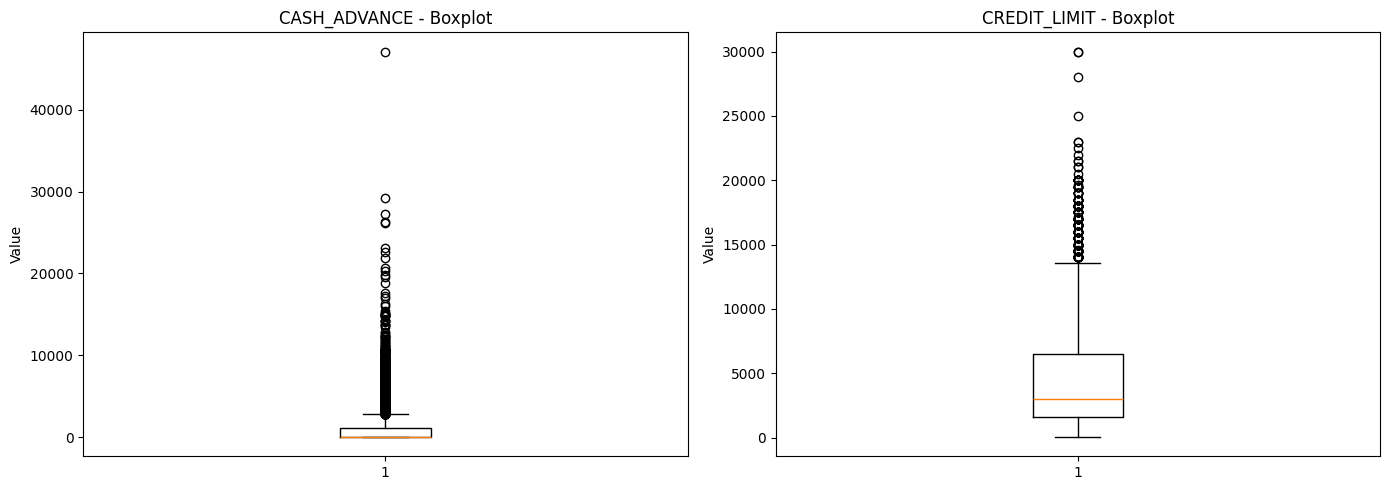

Outliers Summary (IQR Method):
CASH_ADVANCE: 1030 outliers (11.5%)
  - Lower bound: -1670.73, Upper bound: 2784.55

CREDIT_LIMIT: 248 outliers (2.8%)
  - Lower bound: -5750.00, Upper bound: 13850.00


In [26]:
# Boxplots for CASH_ADVANCE and CREDIT_LIMIT
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CASH_ADVANCE boxplot
axes[0].boxplot(dataset['CASH_ADVANCE'])
axes[0].set_title('CASH_ADVANCE - Boxplot')
axes[0].set_ylabel('Value')

# CREDIT_LIMIT boxplot
axes[1].boxplot(dataset['CREDIT_LIMIT'])
axes[1].set_title('CREDIT_LIMIT - Boxplot')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Count outliers using IQR method
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data < lower) | (data > upper)]
    return len(outliers), lower, upper

cash_outliers, cash_lower, cash_upper = count_outliers_iqr(dataset['CASH_ADVANCE'])
credit_outliers, credit_lower, credit_upper = count_outliers_iqr(dataset['CREDIT_LIMIT'])

print("Outliers Summary (IQR Method):")
print(f"CASH_ADVANCE: {cash_outliers} outliers ({cash_outliers/len(dataset)*100:.1f}%)")
print(f"  - Lower bound: {cash_lower:.2f}, Upper bound: {cash_upper:.2f}")
print(f"\nCREDIT_LIMIT: {credit_outliers} outliers ({credit_outliers/len(dataset)*100:.1f}%)")
print(f"  - Lower bound: {credit_lower:.2f}, Upper bound: {credit_upper:.2f}")

---

# Part C - Preprocessing and Model Preparation
# חלק ג' - קדם-עיבוד והתאמה למודל

## 1. Feature Selection / בחירת פיצ'רים

**Features removed:**
- `CUST_ID` - Unique identifier, not relevant for clustering
- `TENURE` - 85% of customers have the same value (12), low variance
- `PRC_FULL_PAYMENT` - Most values concentrated around 0, low variance

**Selected features (9):**
- **Financial amounts:** BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS
- **Frequencies:** PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY
- **Payments:** MINIMUM_PAYMENTS

In [27]:
# Select relevant features for clustering
selected_features = [
    'BALANCE',
    'PURCHASES', 
    'CASH_ADVANCE',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'MINIMUM_PAYMENTS'
]

# Create feature matrix
X = dataset[selected_features]

print(f"Selected {len(selected_features)} features for clustering:")
print(selected_features)
print(f"\nFeature matrix shape: {X.shape}")

Selected 8 features for clustering:
['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'MINIMUM_PAYMENTS']

Feature matrix shape: (8950, 8)


## 2. Standardization (Scaling) / נרמול הנתונים

K-Means uses Euclidean distance, so features must be on the same scale.
Using StandardScaler: transforms each feature to have mean=0 and std=1.

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

print("Data before scaling:")
print(X.describe().round(2))
print("\n" + "="*50)
print("\nData after scaling (mean≈0, std≈1):")
print(X_scaled_df.describe().round(2))

Data before scaling:
        BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  \
count   8950.00    8950.00       8950.00       8950.00   8950.00   
mean    1564.47    1003.20        978.87       4494.28   1733.14   
std     2081.53    2136.63       2097.16       3638.65   2895.06   
min        0.00       0.00          0.00         50.00      0.00   
25%      128.28      39.64          0.00       1600.00    383.28   
50%      873.39     361.28          0.00       3000.00    856.90   
75%     2054.14    1110.13       1113.82       6500.00   1901.13   
max    19043.14   49039.57      47137.21      30000.00  50721.48   

       PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  MINIMUM_PAYMENTS  
count              8950.00                 8950.00           8950.00  
mean                  0.49                    0.14            844.91  
std                   0.40                    0.20           2332.79  
min                   0.00                    0.00              0.02  
25%        

---

# Part D - Finding Optimal Number of Clusters (Elbow Method)
# חלק ד' - מציאת מספר הקלאסטרים האופטימלי

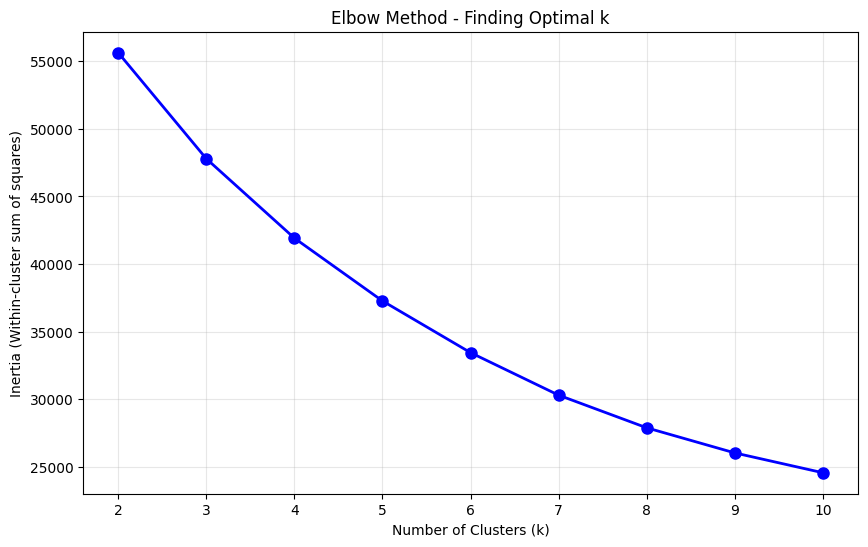

Inertia values for each k:
k=2: 55624.51
k=3: 47789.06
k=4: 41919.88
k=5: 37275.34
k=6: 33453.15
k=7: 30311.05
k=8: 27897.67
k=9: 26040.90
k=10: 24575.74


In [30]:
from sklearn.cluster import KMeans

# Test different values of k (number of clusters)
k_range = range(2, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method - Finding Optimal k')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.show()

# Print inertia values
print("Inertia values for each k:")
for k, inertia in zip(k_range, inertias):
    print(f"k={k}: {inertia:.2f}")

### Elbow Method Analysis / ניתוח שיטת המרפק

Look for the "elbow" point where the rate of decrease in inertia slows down significantly.
This indicates the optimal number of clusters.

מחפשים את נקודת ה"מרפק" - הנקודה שבה קצב הירידה ב-inertia מואט משמעותית.

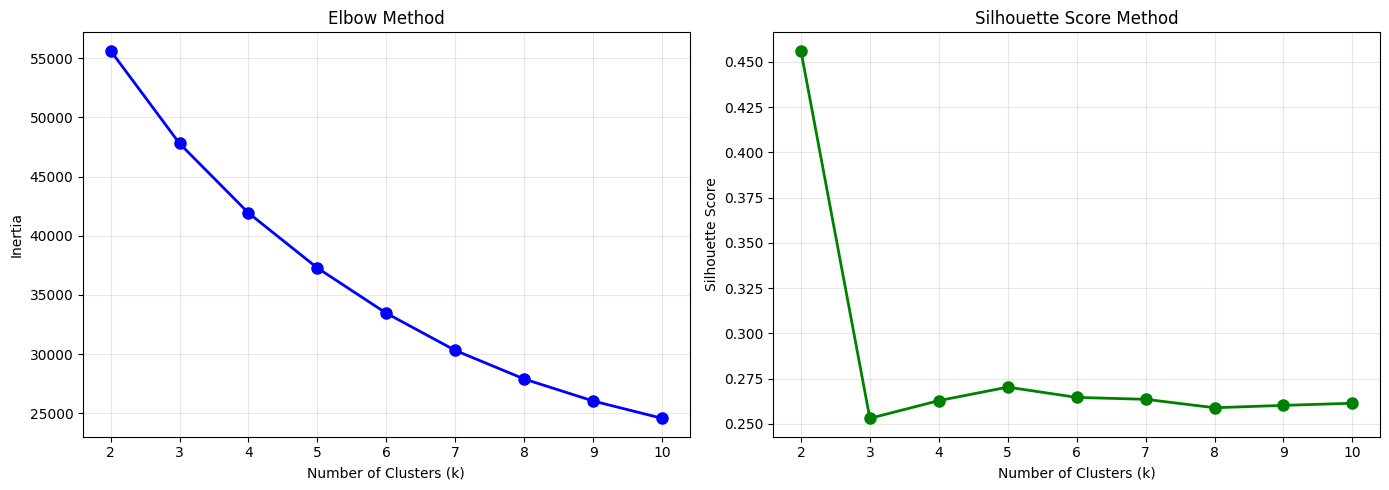

Silhouette Scores for each k:
k=2: 0.4561 <-- Best
k=3: 0.2531
k=4: 0.2629
k=5: 0.2703
k=6: 0.2647
k=7: 0.2636
k=8: 0.2589
k=9: 0.2602
k=10: 0.2614


In [31]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for each k
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot both Elbow and Silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].set_xticks(list(k_range))
axes[0].grid(True, alpha=0.3)

# Silhouette plot
axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Method')
axes[1].set_xticks(list(k_range))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best k based on Silhouette Score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print("Silhouette Scores for each k:")
for k, score in zip(k_range, silhouette_scores):
    marker = " <-- Best" if k == best_k else ""
    print(f"k={k}: {score:.4f}{marker}")

### Optimal k Selection / בחירת k אופטימלי

**Decision: k=5**

While k=2 has the highest Silhouette Score (0.456), it's too simplistic for customer segmentation.
k=5 provides a good balance between:
- Statistical quality (Silhouette Score = 0.27)
- Business interpretability (5 distinct customer segments)
- Actionable marketing insights

---

# Part E - KMeans Training and Cluster Profiling
# חלק ה' - אימון מודל KMeans ופרופילינג של קלאסטרים

## 1. Train KMeans with k=5 and random_state=42

In [33]:
# Train KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)

print(f"KMeans trained with {kmeans.n_clusters} clusters")
print(f"Inertia: {kmeans.inertia_:.2f}")

KMeans trained with 5 clusters
Inertia: 37275.34


## 2. Add Cluster labels to DataFrame

In [34]:
# Add cluster labels to the original dataset
dataset['Cluster'] = kmeans.labels_

# Display cluster distribution
print("Cluster Distribution:")
print(dataset['Cluster'].value_counts().sort_index())
print(f"\nTotal customers: {len(dataset)}")

Cluster Distribution:
Cluster
0     134
1    3833
2      38
3    3792
4    1153
Name: count, dtype: int64

Total customers: 8950


## 3. Cluster Profiling - Calculate average characteristics per cluster

In [37]:
# Calculate cluster profiles using groupby
cluster_profile = dataset.groupby('Cluster')[selected_features].mean()

# Add cluster size
cluster_profile['Cluster_Size'] = dataset.groupby('Cluster').size()
cluster_profile['Cluster_Pct'] = (cluster_profile['Cluster_Size'] / len(dataset) * 100).round(1)

# Reorder columns to show size first
cols = ['Cluster_Size', 'Cluster_Pct'] + selected_features
cluster_profile = cluster_profile[cols]

print("Cluster Profiles (Average values per cluster):")
cluster_profile.round(2)

Cluster Profiles (Average values per cluster):


,Cluster_Size,Cluster_Pct,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,MINIMUM_PAYMENTS
Cluster,,,,,,,,,,
0,134,1.5,4255.55,12616.90,1061.92,12088.06,14108.32,0.89,0.08,2212.88
1,3833,42.8,896.03,1428.73,169.65,4524.65,1470.05,0.86,0.04,536.69
2,38,0.4,4527.32,1001.41,1477.02,4832.89,1965.20,0.50,0.11,27460.38
3,3792,42.4,1041.25,219.81,698.33,2978.73,922.97,0.15,0.14,539.07
4,1153,12.9,5097.04,815.37,4565.60,8484.00,3826.40,0.36,0.45,1839.23


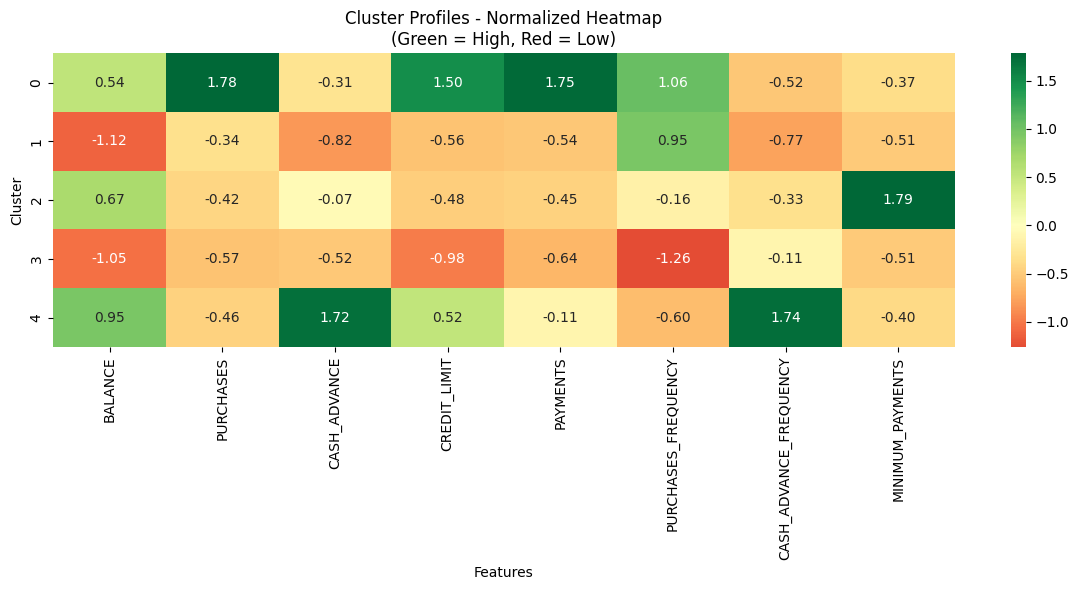

In [36]:
# Visualize cluster profiles with heatmap (normalized for comparison)
cluster_means_normalized = dataset.groupby('Cluster')[selected_features].mean()
cluster_means_normalized = (cluster_means_normalized - cluster_means_normalized.mean()) / cluster_means_normalized.std()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_normalized, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title('Cluster Profiles - Normalized Heatmap\n(Green = High, Red = Low)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

## 4. Cluster Interpretation / פרשנות הקלאסטרים

| Cluster | Size | Name | Key Characteristics |
|---------|------|------|---------------------|
| **0** | 1.5% (134) | **VIP Shoppers** | Highest purchases (12,617), highest payments (14,108), high credit limit (12,088), high purchase frequency (0.89). Premium customers. |
| **1** | 42.8% (3,833) | **Active Buyers** | Moderate purchases (1,429), high purchase frequency (0.86), very low cash advance (170). Healthy, regular customers. |
| **2** | 0.4% (38) | **Outliers - High Debt** | Extremely high minimum payments (27,460). This is an outlier cluster - customers with severe debt issues paying only minimum. |
| **3** | 42.4% (3,792) | **Low Activity** | Low purchases (220), low purchase frequency (0.15), low credit limit (2,979). Inactive or occasional users. |
| **4** | 12.9% (1,153) | **Cash Advance Seekers** | High cash advance (4,566), high cash advance frequency (0.45), high balance (5,097). Risk segment - potential financial distress. |

---

### Summary / סיכום:
- **85%** of customers are in Clusters 1 & 3 (regular customers)
- **Cluster 0** (VIP) - Small but highly profitable
- **Cluster 4** - Risk flag (high cash advances may indicate financial problems)
- **Cluster 2** - Outliers with extreme debt (only 38 customers, 0.4%)

---

# Part F - Summary and Business Conclusions
# חלק ו' - סיכום ומסקנות עסקיות

## 1. Business Insights from Cluster Distribution
## תובנות עסקיות מהתפלגות הקלאסטרים

### Customer Segmentation Overview:

| Segment | Size | Business Value |
|---------|------|----------------|
| **VIP Shoppers** (Cluster 0) | 1.5% | High value - generate most revenue per customer |
| **Active Buyers** (Cluster 1) | 42.8% | Core business - stable, healthy usage patterns |
| **Low Activity** (Cluster 3) | 42.4% | Growth opportunity - potential to activate |
| **Cash Advance Seekers** (Cluster 4) | 12.9% | Risk segment - monitor for defaults |
| **Outliers** (Cluster 2) | 0.4% | High risk - severe debt issues |

### Key Findings:
1. **85% of customers** are either Active Buyers or Low Activity - the main customer base
2. **Only 1.5%** are VIP customers, but they likely contribute disproportionately to revenue
3. **~13%** show risky behavior (cash advances) - need monitoring
4. Clear separation between **purchase-oriented** (Clusters 0,1) and **cash-advance-oriented** (Cluster 4) customers

## 2. Marketing Recommendations and Business Applications
## המלצות שיווקיות ויישומים עסקיים

### Targeted Marketing Strategies:

| Cluster | Segment | Recommended Actions |
|---------|---------|---------------------|
| **0** | VIP Shoppers | Premium rewards program, exclusive offers, personal account manager, higher credit limits, early access to promotions |
| **1** | Active Buyers | Loyalty program, cashback on purchases, installment payment options, category-specific discounts |
| **3** | Low Activity | Activation campaigns, sign-up bonuses for usage, targeted promotions based on interests, reduced fees |
| **4** | Cash Advance Seekers | Financial counseling, debt consolidation offers, controlled credit limit, payment reminders |
| **2** | Outliers (High Debt) | Debt restructuring programs, direct contact from risk management, payment plans |

### Credit Risk Management:
- **Low Risk:** Clusters 0, 1 - healthy payment patterns
- **Medium Risk:** Cluster 3 - low activity but no debt issues
- **High Risk:** Clusters 4, 2 - cash advance dependency and high debt

### Revenue Optimization:
1. **Upsell to Cluster 1** - move Active Buyers toward VIP status with premium card offers
2. **Activate Cluster 3** - 42% of customers are underutilized, huge growth potential
3. **Retain Cluster 0** - protect VIP customers with exclusive benefits
4. **Manage Cluster 4** - reduce exposure while offering debt solutions

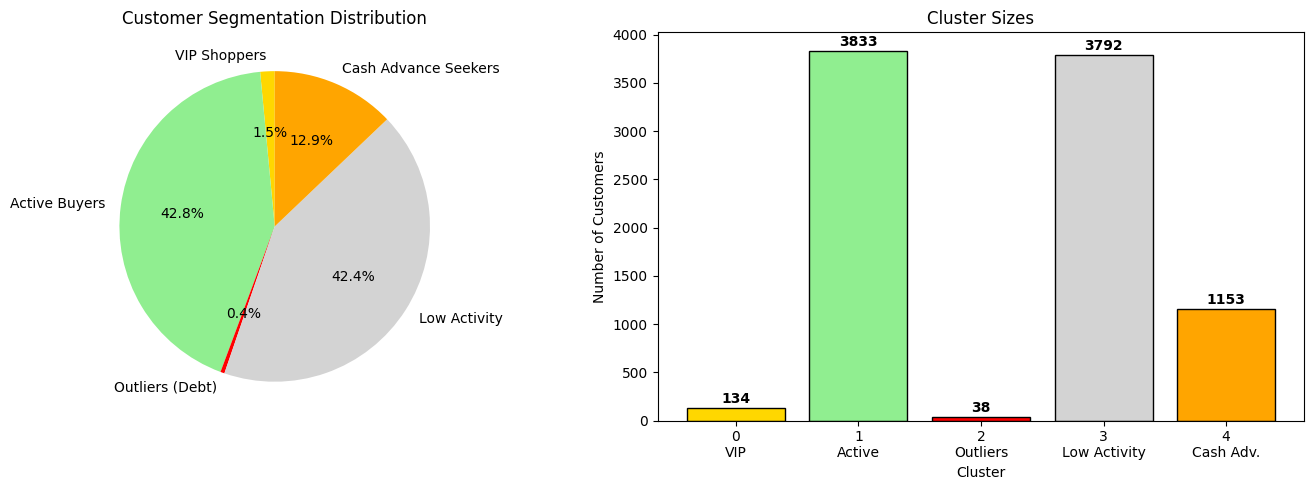

In [38]:
# Final visualization - Cluster distribution pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
cluster_sizes = dataset['Cluster'].value_counts().sort_index()
cluster_names = ['VIP Shoppers', 'Active Buyers', 'Outliers (Debt)', 'Low Activity', 'Cash Advance Seekers']
colors = ['gold', 'lightgreen', 'red', 'lightgray', 'orange']

axes[0].pie(cluster_sizes, labels=cluster_names, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Customer Segmentation Distribution')

# Bar chart with cluster sizes
axes[1].bar(range(5), cluster_sizes, color=colors, edgecolor='black')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Customers')
axes[1].set_title('Cluster Sizes')
axes[1].set_xticks(range(5))
axes[1].set_xticklabels(['0\nVIP', '1\nActive', '2\nOutliers', '3\nLow Activity', '4\nCash Adv.'])

for i, v in enumerate(cluster_sizes):
    axes[1].text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

---

## Conclusion / סיכום

Using K-Means clustering with k=5, we successfully segmented CardWise's customer base into 5 distinct groups:

1. **VIP Shoppers (1.5%)** - High-value premium customers
2. **Active Buyers (42.8%)** - Core customer base with healthy usage
3. **Low Activity (42.4%)** - Dormant customers with activation potential  
4. **Cash Advance Seekers (12.9%)** - Risk segment requiring monitoring
5. **Outliers (0.4%)** - Extreme debt cases

This segmentation enables **targeted marketing**, **personalized offers**, and **risk management** strategies that can improve customer satisfaction, increase revenue, and reduce credit defaults.

---
**End of Analysis**